#                                                          **Forecasting Fiscal Futures: Insights into Tax Revenue**


In [18]:
# Data Understanding

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset

data = pd.read_csv('Sales_Tax_Collections_by_State (1).csv')
data



,state,month,year,tax type,value,fips state,numeric month,note,id
0,Alabama,November,2023,motor fuel,85476394.0,1,11,NaN,1_2023_11
1,Alabama,October,2023,motor fuel,79262088.0,1,10,NaN,1_2023_10
2,Alaska,November,2023,motor fuel,NaN,2,11,NaN,2_2023_11
3,Alaska,October,2023,motor fuel,4575241.0,2,10,NaN,2_2023_10
4,Arizona,November,2023,motor fuel,67376067.0,4,11,NaN,4_2023_11
...,...,...,...,...,...,...,...,...,...
2851,West Virginia,September,2023,motor fuel,34278000.0,54,9,NaN,54_2023_9
2852,Wisconsin,August,2023,motor fuel,108559096.0,55,8,NaN,55_2023_8
2853,Wisconsin,September,2023,motor fuel,93310446.0,55,9,NaN,55_2023_9
2854,Wyoming,August,2023,motor fuel,NaN,56,8,NaN,56_2023_8


In [7]:
# Display the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          2856 non-null   object 
 1   month          2856 non-null   object 
 2   year           2856 non-null   int64  
 3   tax type       2856 non-null   object 
 4   value          2392 non-null   float64
 5   fips state     2856 non-null   int64  
 6   numeric month  2856 non-null   int64  
 7   note           0 non-null      float64
 8   id             2856 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 200.9+ KB


In [6]:

# Display the first few rows of the dataset
data.head()

,state,month,year,tax type,value,fips state,numeric month,note,id
0,Alabama,November,2023,motor fuel,85476394.0,1,11,NaN,1_2023_11
1,Alabama,October,2023,motor fuel,79262088.0,1,10,NaN,1_2023_10
2,Alaska,November,2023,motor fuel,NaN,2,11,NaN,2_2023_11
3,Alaska,October,2023,motor fuel,4575241.0,2,10,NaN,2_2023_10
4,Arizona,November,2023,motor fuel,67376067.0,4,11,NaN,4_2023_11


# 1. Data Cleaning
Remove unnecessary columns.
Handle missing values (impute or remove).
Convert data types if needed (e.g., date columns).

In [13]:
# Data Preparation

# Remove the 'note' column
df=data.drop(columns=['note'])
df

,state,month,year,tax type,value,fips state,numeric month,id,date
0,Alabama,November,2023,motor fuel,85476394.0,1,11,1_2023_11,2023-11-01
1,Alabama,October,2023,motor fuel,79262088.0,1,10,1_2023_10,2023-10-01
2,Alaska,November,2023,motor fuel,NaN,2,11,2_2023_11,2023-11-01
3,Alaska,October,2023,motor fuel,4575241.0,2,10,2_2023_10,2023-10-01
4,Arizona,November,2023,motor fuel,67376067.0,4,11,4_2023_11,2023-11-01
...,...,...,...,...,...,...,...,...,...
2851,West Virginia,September,2023,motor fuel,34278000.0,54,9,54_2023_9,2023-09-01
2852,Wisconsin,August,2023,motor fuel,108559096.0,55,8,55_2023_8,2023-08-01
2853,Wisconsin,September,2023,motor fuel,93310446.0,55,9,55_2023_9,2023-09-01
2854,Wyoming,August,2023,motor fuel,NaN,56,8,56_2023_8,2023-08-01


In [14]:
# Convert 'month' and 'year' to a datetime object for easier time series analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%B')
df

,state,month,year,tax type,value,fips state,numeric month,id,date
0,Alabama,November,2023,motor fuel,85476394.0,1,11,1_2023_11,2023-11-01
1,Alabama,October,2023,motor fuel,79262088.0,1,10,1_2023_10,2023-10-01
2,Alaska,November,2023,motor fuel,NaN,2,11,2_2023_11,2023-11-01
3,Alaska,October,2023,motor fuel,4575241.0,2,10,2_2023_10,2023-10-01
4,Arizona,November,2023,motor fuel,67376067.0,4,11,4_2023_11,2023-11-01
...,...,...,...,...,...,...,...,...,...
2851,West Virginia,September,2023,motor fuel,34278000.0,54,9,54_2023_9,2023-09-01
2852,Wisconsin,August,2023,motor fuel,108559096.0,55,8,55_2023_8,2023-08-01
2853,Wisconsin,September,2023,motor fuel,93310446.0,55,9,55_2023_9,2023-09-01
2854,Wyoming,August,2023,motor fuel,NaN,56,8,56_2023_8,2023-08-01


In [15]:
# Data Processing
# Handle missing values in 'value' by imputing with the median for each state and tax type combination

df.isnull().sum()

state              0
month              0
year               0
tax type           0
value            464
fips state         0
numeric month      0
id                 0
date               0
dtype: int64

In [29]:
df['value'].fillna(df['value'].mean(),inplace=True)


In [30]:
# Check for remaining missing values
df.isnull().sum()

state            0
month            0
year             0
tax type         0
value            0
fips state       0
numeric month    0
id               0
date             0
dtype: int64

In [31]:
# Define a dictionary mapping state names to ISO codes
state_iso_mapping = {
    'Alabama': 'US-AL',
    'Alaska': 'US-AK',
    'Arizona': 'US-AZ',
    'Arkansas': 'US-AR',
    'California': 'US-CA',
    'Colorado': 'US-CO',
    'Connecticut': 'US-CT',
    'Delaware': 'US-DE',
    'Florida': 'US-FL',
    'Georgia': 'US-GA',
    'Hawaii': 'US-HI',
    'Idaho': 'US-ID',
    'Illinois': 'US-IL',
    'Indiana': 'US-IN',
    'Iowa': 'US-IA',
    'Kansas': 'US-KS',
    'Kentucky': 'US-KY',
    'Louisiana': 'US-LA',
    'Maine': 'US-ME',
    'Maryland': 'US-MD',
    'Massachusetts': 'US-MA',
    'Michigan': 'US-MI',
    'Minnesota': 'US-MN',
    'Mississippi': 'US-MS',
    'Missouri': 'US-MO',
    'Montana': 'US-MT',
    'Nebraska': 'US-NE',
    'Nevada': 'US-NV',
    'New Hampshire': 'US-NH',
    'New Jersey': 'US-NJ',
    'New Mexico': 'US-NM',
    'New York': 'US-NY',
    'North Carolina': 'US-NC',
    'North Dakota': 'US-ND',
    'Ohio': 'US-OH',
    'Oklahoma': 'US-OK',
    'Oregon': 'US-OR',
    'Pennsylvania': 'US-PA',
    'Rhode Island': 'US-RI',
    'South Carolina': 'US-SC',
    'South Dakota': 'US-SD',
    'Tennessee': 'US-TN',
    'Texas': 'US-TX',
    'Utah': 'US-UT',
    'Vermont': 'US-VT',
    'Virginia': 'US-VA',
    'Washington': 'US-WA',
    'West Virginia': 'US-WV',
    'Wisconsin': 'US-WI',
    'Wyoming': 'US-WY'
}

In [33]:
# Add a new column 'iso_code' to the cleaned dataset using the mapping

df['iso_code'] = df['state'].map(state_iso_mapping)
df

,state,month,year,tax type,value,fips state,numeric month,id,date,iso_code
0,Alabama,November,2023,motor fuel,8.547639e+07,1,11,1_2023_11,2023-11-01,US-AL
1,Alabama,October,2023,motor fuel,7.926209e+07,1,10,1_2023_10,2023-10-01,US-AL
2,Alaska,November,2023,motor fuel,3.644974e+06,2,11,2_2023_11,2023-11-01,US-AK
3,Alaska,October,2023,motor fuel,4.575241e+06,2,10,2_2023_10,2023-10-01,US-AK
4,Arizona,November,2023,motor fuel,6.737607e+07,4,11,4_2023_11,2023-11-01,US-AZ
...,...,...,...,...,...,...,...,...,...,...
2851,West Virginia,September,2023,motor fuel,3.427800e+07,54,9,54_2023_9,2023-09-01,US-WV
2852,Wisconsin,August,2023,motor fuel,1.085591e+08,55,8,55_2023_8,2023-08-01,US-WI
2853,Wisconsin,September,2023,motor fuel,9.331045e+07,55,9,55_2023_9,2023-09-01,US-WI
2854,Wyoming,August,2023,motor fuel,8.898110e+07,56,8,56_2023_8,2023-08-01,US-WY


In [34]:
# Save the cleaned dataset as a new CSV file
df.to_csv('cleaned_Tax_data.csv', index=False)


# 2. Descriptive Statistics
Calculate summary statistics (mean, median, standard deviation, etc.) for tax collections.
Explore distribution of tax collections across states and over time.

In [36]:
import pandas as pd
# Load the cleaned dataset
data_cleaned = pd.read_csv('cleaned_Tax_data.csv')

In [38]:
# Summary Statistics
# Calculate descriptive statistics of tax collections
tax_stats = data_cleaned.groupby('state')['value'].describe().reset_index()
tax_stats

,state,count,mean,std,min,25%,50%,75%,max
0,Alabama,56.0,7.229110e+07,1.009014e+07,5.057929e+07,6.650208e+07,7.511209e+07,7.989597e+07,8.579236e+07
1,Alaska,56.0,3.922233e+06,8.879462e+05,2.706976e+06,3.317520e+06,3.644974e+06,4.374257e+06,6.275608e+06
2,Arizona,56.0,6.426223e+07,4.924977e+06,4.260382e+07,6.241921e+07,6.442763e+07,6.733441e+07,7.272024e+07
3,Arkansas,56.0,4.616657e+07,4.070180e+06,3.735100e+07,4.305208e+07,4.677297e+07,4.909641e+07,5.393108e+07
4,California,56.0,6.871059e+08,7.881196e+07,4.278000e+08,6.479990e+08,6.931380e+08,7.348130e+08,8.415050e+08
5,Colorado,56.0,5.503989e+07,9.204847e+06,2.988500e+07,4.895450e+07,5.514800e+07,6.041500e+07,7.463700e+07
6,Connecticut,56.0,3.475992e+07,1.158275e+07,9.463538e+06,3.476568e+07,3.937423e+07,4.145722e+07,4.994798e+07
7,Delaware,56.0,1.351167e+07,1.466237e+06,8.376805e+06,1.354093e+07,1.354093e+07,1.354093e+07,1.972248e+07
8,District of Columbia,56.0,2.039016e+06,3.275221e+06,-1.378190e+07,1.712432e+06,1.907737e+06,2.198583e+06,1.943577e+07
9,Florida,56.0,2.489107e+08,2.788572e+07,1.523706e+08,2.398501e+08,2.530081e+08,2.610778e+08,3.117721e+08


<Axes: title={'center': 'Tax Stats'}, ylabel='Frequency'>

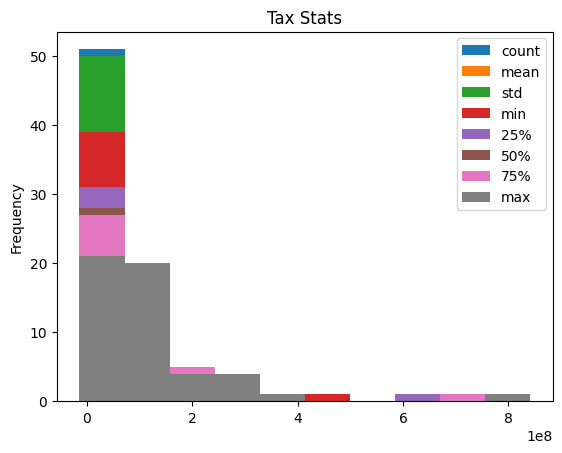

In [39]:
from matplotlib import pyplot as plt
tax_stats.plot(kind='hist',title='Tax Stats')


<Axes: xlabel='mean', ylabel='std'>

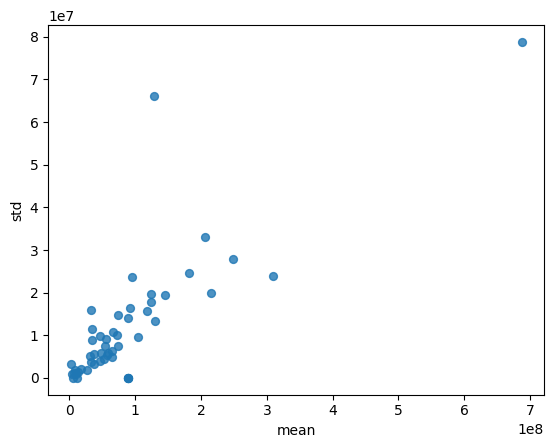

In [42]:
from matplotlib import pyplot as plt
tax_stats.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)


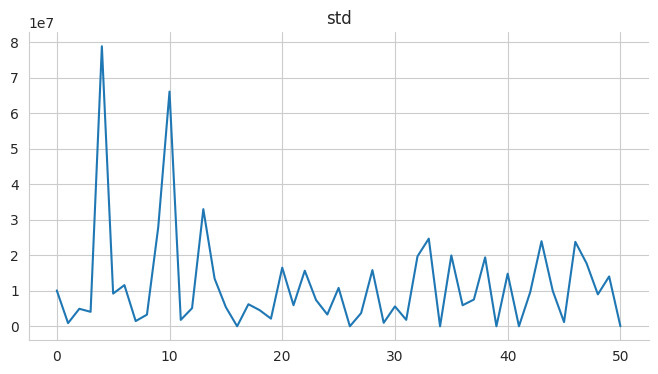

In [112]:
from matplotlib import pyplot as plt
tax_stats['std'].plot(kind='line', figsize=(8, 4), title='std')


# 3. Exploratory Analysis
Visualize tax collections trends over time.
Compare tax collections among different states.
Explore correlations between tax collections and other variables if available.

C:\Users\CRAY\AppData\Local\Temp\ipykernel_4332\1713376182.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value', y='state', data=tax_by_state, ax=ax[1], palette='viridis')


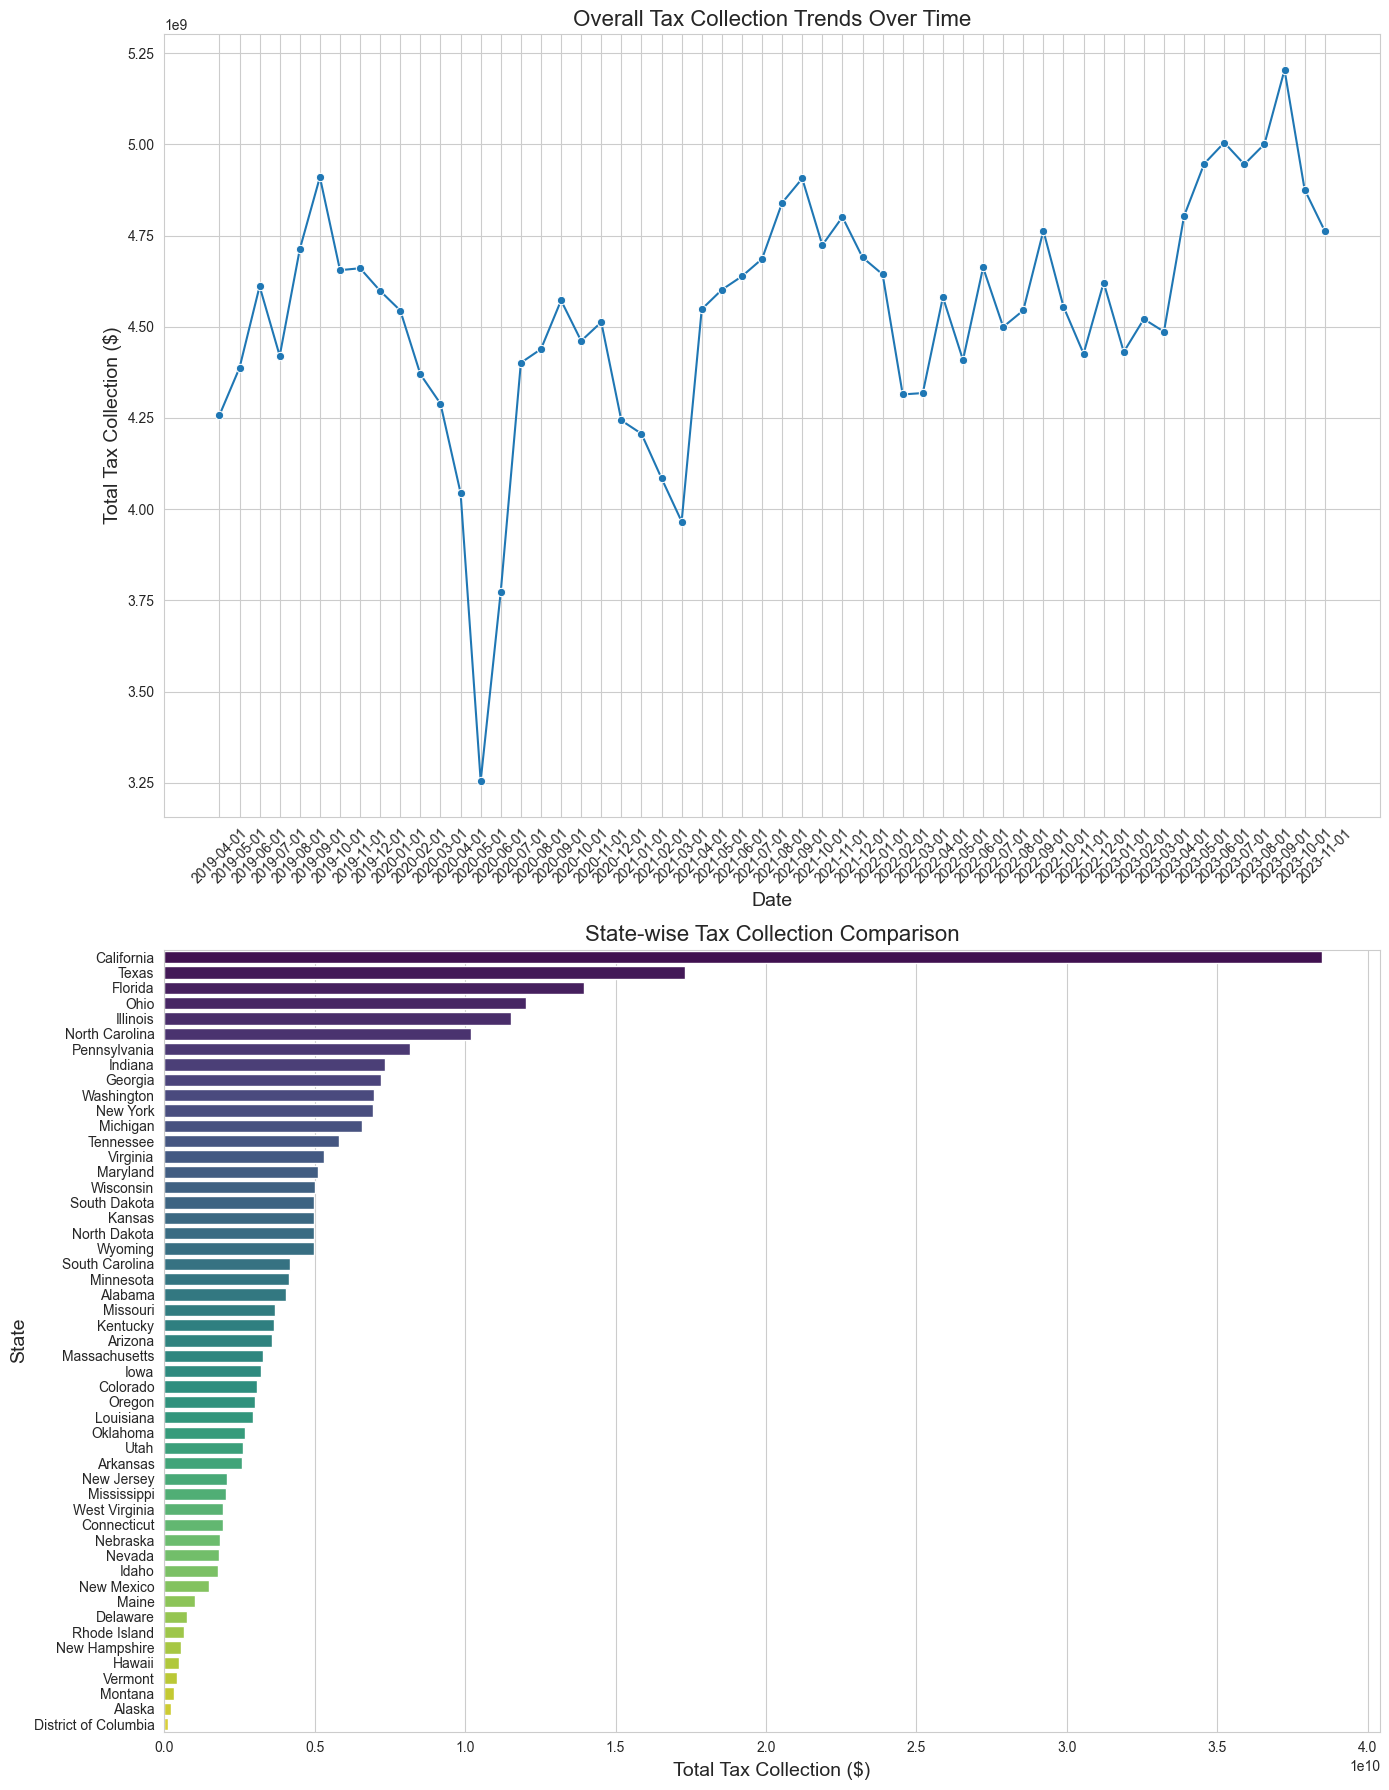

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data for the visualizations
# Total tax collections over time
tax_over_time = data_cleaned.groupby('date')['value'].sum().reset_index()

# Total tax collections by state
tax_by_state = data_cleaned.groupby('state')['value'].sum().sort_values(ascending=False).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 18))

# Overall Tax Collection Trends Over Time
sns.lineplot(x='date', y='value', data=tax_over_time, ax=ax[0], marker='o')
ax[0].set_title('Overall Tax Collection Trends Over Time', fontsize=16)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('Total Tax Collection ($)', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

# State-wise Tax Collection Comparison
sns.barplot(x='value', y='state', data=tax_by_state, ax=ax[1], palette='viridis')
ax[1].set_title('State-wise Tax Collection Comparison', fontsize=16)
ax[1].set_xlabel('Total Tax Collection ($)', fontsize=14)
ax[1].set_ylabel('State', fontsize=14)

plt.tight_layout()
plt.show()



# Predictive Data Analysis



In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from itertools import product


In [71]:
# Define features and target variable
X = data_cleaned[['year', 'numeric month', 'fips state']]  # Features
y = data_cleaned['value']  # Target variable

In [72]:
# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [73]:
# Predict tax collections for all states
predicted_values = rf_model.predict(X)


In [74]:
# Add predicted values to the dataset
data_cleaned['predicted_value'] = predicted_values

In [76]:
# Historical Analysis: Find states with the highest and lowest tax collections in the last 5 years
last_5_years_data = data_cleaned[data_cleaned['year'] >= (data_cleaned['year'].max() - 4)]
highest_state_last_5_years = last_5_years_data.groupby('state')['predicted_value'].sum().idxmax()
lowest_state_last_5_years = last_5_years_data.groupby('state')['predicted_value'].sum().idxmin()

print("Historical Analysis (Last 5 Years):")
print(f"State with the highest tax collections: {highest_state_last_5_years}")
print(f"State with the lowest tax collections: {lowest_state_last_5_years}")



Historical Analysis (Last 5 Years):
State with the highest tax collections: California
State with the lowest tax collections: District of Columbia


In [107]:
# Future Prediction: Predict states with the highest and lowest tax collections in the future
future_data = pd.DataFrame(columns=['year', 'numeric month', ' fips state'])
future_data['year'] = range(data_cleaned['year'].max() + 1, data_cleaned['year'].max() + 6)  # Next 5 years
future_data['numeric month'] = 1  # Assume January for simplicity


 #Replicate rows for each state
states = data_cleaned['fips state'].unique()
future_data = pd.DataFrame(list(product(range(data_cleaned['year'].max() + 1, data_cleaned['year'].max() + 6), [1], states)), columns=['year', 'numeric month', 'fips state'])


# Predict tax collections for future data
future_predicted_values = rf_model.predict(future_data[['year', 'numeric month', 'fips state']])

In [81]:
# Add predicted values for future years to the dataset
future_data['predicted_value'] = future_predicted_values

In [82]:
# Find states with the highest and lowest predicted tax collections in the future
future_highest_state = future_data.groupby('fips state')['predicted_value'].sum().idxmax()
future_lowest_state = future_data.groupby('fips state')['predicted_value'].sum().idxmin()

print("\nFuture Prediction (Next 5 Years):")
print(f"State predicted to have the highest tax collections: {future_highest_state}")
print(f"State predicted to have the lowest tax collections: {future_lowest_state}")


Future Prediction (Next 5 Years):
State predicted to have the highest tax collections: 6
State predicted to have the lowest tax collections: 11


In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [86]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Initialize and train the Gradient Boosting Machine model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [90]:
# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [91]:
print("Gradient Boosting Machine Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")


Gradient Boosting Machine Model Evaluation:
Mean Squared Error (MSE): 636986982569433.75
Root Mean Squared Error (RMSE): 25238601.04
R-squared Score (R2): 0.95


In [92]:
# Now we can use this model for predictions and further analysis
# Historical Analysis: Find Which State is Highest in Last 5 Years
last_5_years_data = data_cleaned[data_cleaned['year'] >= (data_cleaned['year'].max() - 4)]
total_tax_collections_last_5_years = last_5_years_data.groupby('state')['value'].sum()
highest_state_last_5_years = total_tax_collections_last_5_years.idxmax()
highest_tax_last_5_years = total_tax_collections_last_5_years.max()

In [93]:
print("Historical Analysis (Last 5 Years):")
print(f"State with the highest tax collections in the last 5 years: {highest_state_last_5_years} (${highest_tax_last_5_years:.2f})")


Historical Analysis (Last 5 Years):
State with the highest tax collections in the last 5 years: California ($38477931000.00)


In [94]:
# Find Which State has Lowest in Last 5 Years
lowest_state_last_5_years = total_tax_collections_last_5_years.idxmin()
lowest_tax_last_5_years = total_tax_collections_last_5_years.min()

print(f"State with the lowest tax collections in the last 5 years: {lowest_state_last_5_years} (${lowest_tax_last_5_years:.2f})")


State with the lowest tax collections in the last 5 years: District of Columbia ($114184889.00)


In [97]:
# Future Prediction: Find Which State Will be Highest and Lowest in Future
# Predict tax collections for future years using the GBM model
future_predicted_values = gbm_model.predict(future_data[['year', 'numeric month', 'fips state']])

In [98]:
# Add predicted values for future years to the dataset
future_data['predicted_value'] = future_predicted_values

In [99]:
# Aggregate predicted values by state
predicted_tax_collections_future = future_data.groupby('fips state')['predicted_value'].sum()

In [100]:

# Find states with the highest and lowest predicted tax collections in the future
highest_state_future = predicted_tax_collections_future.idxmax()
highest_tax_future = predicted_tax_collections_future.max()

print("\nFuture Prediction (Next 5 Years):")
print(f"State predicted to have the highest tax collections in the future: {highest_state_future} (${highest_tax_future:.2f})")

lowest_state_future = predicted_tax_collections_future.idxmin()
lowest_tax_future = predicted_tax_collections_future.min()

print(f"State predicted to have the lowest tax collections in the future: {lowest_state_future} (${lowest_tax_future:.2f})")


Future Prediction (Next 5 Years):
State predicted to have the highest tax collections in the future: 6 ($3292660163.09)
State predicted to have the lowest tax collections in the future: 11 ($63358186.43)
